In [ ]:
%load_ext autoreload
%autoreload 2


In [ ]:
import sys
import localSettings as ls
print(ls.main_path)

In [10]:
from scipy.spatial.transform import Rotation as R
from numpy import arccos, array
from numpy.linalg import norm

# Note: returns angle in radians
def theta(v, w): return arccos(v.dot(w)/(norm(v)*norm(w)))* 180 / 3.1415926

def GetNuMIAngle( px,  py,  pz):
    r = R.from_matrix([[0.92103853804025681562   , 0.022713504803924120662, 0.38880857519374290021  ],
                       [4.6254001262154668408e-05, 0.99829162468141474651 , -0.058427989452906302359],
                       [-0.38947144863934973769  , 0.053832413938664107345, 0.91946400794392302291  ]])  
    r = r.inv()
    beamCoords = r.apply([px,  py,  pz])
    beamDir    = [0,0,1]
    print(theta(beamCoords,beamDir))
    return theta(beamCoords,beamDir)

def GetNuMIAnglePol( phiBNB,  thetaBNB):
    import math
    px = math.sin(thetaBNB)*math.cos(phiBNB)
    py = math.sin(thetaBNB)*math.sin(phiBNB)
    pz = math.cos(thetaBNB)
    GetNuMIAngle( px,  py,  pz)
    


GetNuMIAngle( 0.0, 0.0, 1.)

GetNuMIAngle( 0.277040, -0.064675, -0.141098)
GetNuMIAngle(   0.182530,  0.158082, -0.068212)
GetNuMIAngle(   0.213463, -0.083414, -0.067910)
GetNuMIAngle(  -0.093600, -0.148834, -0.059463)
GetNuMIAngle(   0.139872, -0.182576, -0.135256)
GetNuMIAngle(  -0.072833, -0.105845, -0.067828)
GetNuMIAngle(  -0.109647,  0.097137, -0.152170)
GetNuMIAngle(   0.233304, -0.187030, -0.075744)
GetNuMIAngle(   0.083866, -0.223801, -0.059519)
GetNuMIAngle(   0.242104,  0.134643, -0.094935)
print()

GetNuMIAnglePol(-0.229342,   2.031215)
GetNuMIAnglePol( 0.713744,   1.846112)
GetNuMIAnglePol(-0.372519,   1.858868)
GetNuMIAnglePol(-2.132187,   1.896924)
GetNuMIAnglePol(-0.917068 ,  2.102407)
GetNuMIAnglePol(-2.173497  , 2.056529)
GetNuMIAnglePol( 2.416621  , 2.375226)
GetNuMIAnglePol(-0.675751  , 1.818889)
GetNuMIAnglePol(-1.212260  , 1.814867)
GetNuMIAnglePol( 0.507544  , 1.900948)

23.152151474538137
93.29282598045393
90.22507272719386
83.89308688808288
116.34659562742715
102.84376158288829
125.56315886602496
153.01428805226936
84.04640139693174
92.10377937804688
90.20037698545325

93.29284497058015
90.22514062677546
83.89303332722348
116.3465600283864
102.8438713392707
125.56329676232654
153.01437391987312
84.04645062222679
92.10384711244873
90.20040163313801


Text(0.5, 0, 'Angle from NuMI beam for high theta')

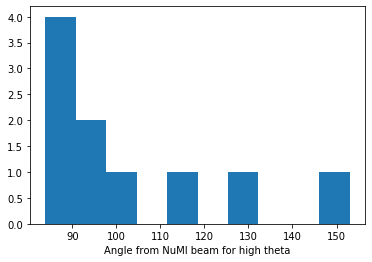

In [14]:
import numpy as np
import matplotlib.pyplot as plt

highAngles = [93.29282598045393,90.22507272719386,83.89308688808288,116.34659562742715,102.84376158288829,125.56315886602496,153.01428805226936,84.04640139693174,92.10377937804688,90.20037698545325]
arr = np.array(highAngles)
fig, ax = plt.subplots()
ax.hist(arr)
ax.set_xlabel("Angle from NuMI beam for high theta")

In [ ]:
main_path = ls.main_path
sys.path.append(main_path)

In [ ]:
from datetime import datetime
now = datetime.now()
date_time = now.strftime("%m%d%Y")
print("date and time:",date_time)

In [ ]:
import plotter
import importlib
importlib.reload(plotter)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward

params = {
    'axes.labelsize': 'x-large',
    'axes.titlesize': 'x-large',
    'xtick.labelsize': 'x-large',
    'ytick.labelsize': 'x-large'
}
pylab.rcParams.update(params)

In [ ]:
tree = "NeutrinoSelectionFilter"
FHC   = 'neutrinoselection_filt_run1_overlay'         +ls.APPEND
RHC   = 'neutrinoselection_filt_run3b_overlay'         +ls.APPEND
fhc   = uproot.open(ls.ntuple_path+FHC +".root")[ls.fold][tree]
rhc   = uproot.open(ls.ntuple_path+RHC +".root")[ls.fold][tree]

uproot_v = [fhc,rhc]



In [ ]:
variables = [ "nu_pdg", "true_nu_px","true_nu_py","true_nu_pz"]
#make the list unique
variables = list(set(variables))
print(variables)

    
WEIGHTS     = ["weightSpline","weightTune","weightSplineTimesTune"]
SYSTEMATICS = ['weightsFlux','weightsGenie']


mc = mc.pandas.df(variables + WEIGHTS + SYSTEMATICS, flatten=False)

In [ ]:
df_v = [mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df.loc[ df['weightTune'] <= 0, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] == np.inf, 'weightTune' ] = 1.
    df.loc[ df['weightTune'] > 100, 'weightTune' ] = 1.
    df.loc[ np.isnan(df['weightTune']) == True, 'weightTune' ] = 1.    
    df.loc[ df['weightSplineTimesTune'] <= 0, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] == np.inf, 'weightSplineTimesTune' ] = 1.
    df.loc[ df['weightSplineTimesTune'] > 100, 'weightSplineTimesTune' ] = 1.
    df.loc[ np.isnan(df['weightSplineTimesTune']) == True, 'weightSplineTimesTune' ] = 1.


In [ ]:
df_v = [mc]
#removeGenieTune = False
for i,df in enumerate(df_v):
    df['true_nu_Energy']    = df['true_nu_px'] * df['true_nu_py'] + df['true_nu_py'] * df['true_nu_py'] +df['true_nu_pz'] * df['true_nu_pz'] 
    df['true_nu_Energy']    = df['true_nu_Energy']**(1/2)
    df['true_nu_costheta']  = df['true_nu_pz']/df['true_nu_Energy']
    df['true_nu_NuMITheta'] = df.apply(lambda x : GetNuMIAngle(x['true_nu_px'],x['true_nu_py'],x['true_nu_pz']) ,axis = 1)
    
    #df['true_nu_theta']    = 57.2958*np.arccos(df['true_nu_costheta'])
    #df['true_nu_phi']      = 57.2958*np.arctan(df['true_nu_py']/df['true_nu_px'])
    df['true_nu_NuMITheta'].plot.hist(bins=120)
    #df['true_nu_phi']  .plot.hist(bins=120)
    
    

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
df_v = [mc]
for i,df in enumerate(df_v):
    df.plot.scatter(x='true_nu_Energy',y='true_nu_NuMITheta')

In [ ]:
import numpy as np 
from pandas import DataFrame
import matplotlib.pyplot as plt

index = ['aaa', 'bbb', 'ccc', 'ddd', 'eee']
columns = ['A', 'B', 'C', 'D']
df = DataFrame(abs(np.random.randn(5, 4)), index=index, columns=columns)
print (df)
plt.pcolor(df)
plt.yticks(np.arange(0.5, len(df.index), 1), df.index)
plt.xticks(np.arange(0.5, len(df.columns), 1), df.columns)
plt.show()

In [ ]:
newDf = mc.loc[mc['true_nu_Energy'] < 5 & ((mc['nu_pdg'] == 13) | (mc['nu_pdg'] == -13)), : ] 

In [ ]:
newDf14      = mc.loc[((mc['true_nu_Energy'] < 5) & (mc['true_nu_Energy'] > 0.250 ) & (mc['nu_pdg'] == 14)), : ] 
newDfMinus14 = mc.loc[((mc['true_nu_Energy'] < 5) & (mc['true_nu_Energy'] > 0.250 ) & (mc['nu_pdg'] == -14)), : ] 


In [ ]:
print (newDfMinus14.shape[0])
fig0BS, ax0BS = plt.subplots()
plt.title("True NuMu and NuMu bar in RHC, no selection")
ax0BS.set_xlabel('True KE [GeV]')
ax0BS.set_ylabel('CV True Events')
hist , range_ = np.histogram(newDf14['true_nu_Energy'], bins=10)
center = (range_[1:]+range_[:-1])/2
width  = (range_[1:]-range_[:-1])
hist2,range2_  = np.histogram(newDfMinus14['true_nu_Energy'], bins=range_)
print(range2_-range_)
ax0BS.bar(center, hist , width,label="NuMu" )
ax0BS.bar(center, hist2, width,label="NuMuBar",bottom=hist )
plt.legend()
ax2 = ax0BS.twinx()
color = 'tab:red'
#ax2.plot(t, data2, color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.plot( center, hist2/(hist+hist2), color=color, label="Ratio") #,linecolor=color,fill=False )
ax2.set_ylabel('NuMu Bar/(NuMuBar+NuMu)',color=color)
ax2.set_ylim(0,1)
#plt.legend()


In [ ]:
from matplotlib.colors import LogNorm
from matplotlib.cm import get_cmap
import copy

#newDf = mc.loc[((mc['true_nu_Energy'] < 2) & ((mc['nu_pdg'] == 12) | (mc['nu_pdg'] == -12))), : ] 
newDf = mc.loc[((mc['true_nu_Energy'] > 0.25) & (mc['nu_pdg'] == 14) ), : ] 
#newDf = mc.loc[mc['true_nu_Energy'] > 5, : ] 
heatmap, xedges, yedges = np.histogram2d(newDf['true_nu_Energy'], newDf['true_nu_NuMITheta'],
                                         weights=newDf['weightSplineTimesTune'],bins=50)
print (newDf['true_nu_Energy'].max())
my_cmap = copy.copy(get_cmap('plasma')) # copy the default cmap
my_cmap.set_bad((0,0,0))
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
extent = [0, 5, 0, 140]
print(extent)
fig, ax  = plt.subplots(figsize=(15,10))
pos = ax.imshow(heatmap.T, extent=extent, origin='lower',norm=LogNorm(), aspect="auto",cmap=my_cmap)
fig.colorbar(pos, ax=ax)
plt.xlabel('Energy [GeV]')
plt.ylabel('Angle [Deg]')


In [ ]:
#newnewDf = mc.loc[ newDf['true_nu_Energy'] > 0.25, : ] 
newnewDf  = newDf.loc[newDf['true_nu_Energy'] > 0.25, : ] 
#pos1       = plt.hist(newnewDf['true_nu_NuMITheta'], weights=newnewDf['weightSplineTimesTune'], bins=12)
pos       = plt.hist(newnewDf['true_nu_NuMITheta'], weights=newnewDf['weightSplineTimesTune'], bins=12)
#pos       = plt.hist(newnewDf['true_nu_NuMITheta'],  density=True, bins=12)
#area = sum(numpy.diff(bins)*values)
#newnewDf['puppa'] = newnewDf['true_nu_NuMITheta']/pos[0].sum()
print(pos)
print(pos[0][0]/pos[0].sum())
plt.ylabel('Percentage')
plt.xlabel('Angle [Deg]')

In [ ]:
def plot_2d(self, variable1_name, variable2_name, query="selected==1", track_cuts=None, **plot_options):
        variable1, weight1 = self._get_variable(variable1_name, query, track_cuts=track_cuts)
        variable2, weight2 = self._get_variable(variable2_name, query, track_cuts=track_cuts)

        heatmap, xedges, yedges = np.histogram2d(variable1, variable2,
                                                 range=[[plot_options["range_x"][0], plot_options["range_x"][1]], [plot_options["range_y"][0], plot_options["range_y"][1]]],
                                                 bins=[plot_options["bins_x"], plot_options["bins_y"]],
                                                 weights=weight1)

        extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
        fig, axes  = plt.subplots(1,3, figsize=(15,5))

        axes[0].imshow(heatmap.T, extent=extent, origin='lower', aspect="auto")

        data_variable1 = self._selection(variable1_name, self.samples["data"], query=query, track_cuts=track_cuts)
        data_variable1 = self._select_showers(data_variable1, variable1_name, self.samples["data"], query=query)

        data_variable2 = self._selection(
            variable2_name, self.samples["data"], query=query, track_cuts=track_cuts)
        data_variable2 = self._select_showers(
            data_variable2, variable2_name, self.samples["data"], query=query)

        heatmap_data, xedges, yedges = np.histogram2d(data_variable1, data_variable2, range=[[plot_options["range_x"][0], plot_options["range_x"][1]], [
                                                      plot_options["range_y"][0], plot_options["range_y"][1]]],
                                                      bins=[plot_options["bins_x"],
                                                      plot_options["bins_y"]])

        axes[1].imshow(heatmap_data.T, extent=extent, origin='lower', aspect="auto")

        ratio = heatmap_data/heatmap
        im_ratio = axes[2].imshow(ratio.T, extent=extent, origin='lower', aspect='auto', vmin=0, vmax=2, cmap="coolwarm")
        fig.colorbar(im_ratio)

        axes[0].title.set_text('MC+EXT')
        axes[1].title.set_text('Data')
        axes[2].title.set_text('Data/(MC+EXT)')
        if "title" in plot_options:
            axes[0].set_xlabel(plot_options["title"].split(";")[0])
            axes[0].set_ylabel(plot_options["title"].split(";")[1])
            axes[1].set_xlabel(plot_options["title"].split(";")[0])
            axes[2].set_xlabel(plot_options["title"].split(";")[0])
        else:
            axes[0].set_xlabel(variable1_name)
            axes[0].set_ylabel(variable2_name)
            axes[1].set_xlabel(variable1_name)
            axes[2].set_xlabel(variable1_name)

        return fig, axes